In [2]:
import pandas as pd
import re
import collections
'''
Note that we can not import Counter
The reason is that Counter is a function
'''

'\nNote that we can not import Counter\nThe reason is that Counter is a function\n'

In [8]:
def clean_text(text):
        """
        This function cleans the text in the following ways
        1. Replace websites with URL
        2. Replace 's with <space>'s (e.g., her's --> her 's)
        """
        text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "URL", text) # Replace urls with special token
        #text = text.replace("\'s", "")
        #text = text.replace("\'", "")
        #text = text.replace("n\'t", " n\'t")
        text = text.replace("@", "")
        text = text.replace(":", "")
        text = text.replace("#", "")
        text = text.replace("_", " ")
        text = text.replace("-", " ")
        text = text.replace("&amp;", "")
        text = text.replace("&gt;", "")
        text = text.replace("\"", "")
        text = text.replace("$MENTION$", '')
        text = text.replace("$ URL $", '')
        text = text.replace("$URL$", '')
        text = text.replace(".", "")
        text = text.replace(",", "")
        text = text.replace("(", "")
        text = text.replace(")", "")
        text = text.replace("<end>", "")
        text = text.replace("|", "")
        text = text.lower()
        return text.strip() # Return a copy of the string with leading and trailing whitespace removed.

def change_label(label):
    if label == 'non-rumours':
        label = 0
    elif label == 'rumours':
        label = 1
    return label

In [9]:
dataset = pd.read_csv('Pheme.csv')
X = dataset['Text']
y = dataset['Label']

X = X.apply(lambda x: clean_text(x))
X = X.apply(lambda x: x.split())

y = y.apply(lambda x: change_label(x))

X, y

(0       [breaking, a, germanwings, airbus, a320, has, ...
 1       [updated, numbers, ap, breaking, germanwings, ...
 2       [yannikouts, germanwings, flightradar24, a, bi...
 3       [germanwings, co, pilot, suffered, serious, de...
 4       [thisisgaza, إِنَّا, لِلّهِ, وَإِنَّـا, إِلَيْ...
                               ...                        
 6421    [franz, marc, horses, update, gurlitt, nazi, t...
 6422    [munich, district, court, has, confirmed, the,...
 6423    [where, should, the, gurlitt, collection, go?,...
 6424    [drdonnayates, they, should, insure, the, swis...
 6425    [‘the, gurlitt, collection, should, be, sold, ...
 Name: Text, Length: 6426, dtype: object,
 0       1.0
 1       1.0
 2       1.0
 3       1.0
 4       1.0
        ... 
 6421    0.0
 6422    0.0
 6423    0.0
 6424    0.0
 6425    0.0
 Name: Label, Length: 6426, dtype: float64)

In [10]:
import torch

torch.tensor(y)

tensor([1., 1., 1.,  ..., 0., 0., 0.], dtype=torch.float64)

The string type of the token is inconvenient to be used by models, which take numerical inputs. Now let us build a dictionary, often called **vocabulary 词典** as well, to map string tokens into numerical indices starting from 0. To do so, we first count the unique tokens in all the documents from the training set, namely a **corpus 语料**, and then assign a numerical index to each unique token according to its frequency.

Any token that does not exist in the corpus or has been removed is mapped into a special unknown token “<unk>”. We optionally add a list of reserved tokens, such as “<pad>” for padding, “<bos>” to present the beginning for a sequence, and “<eos>” for the end of a sequence.

#### The question is how to count the token frequencies

In [80]:
# for demo purpose, only take two of them and store them into the Var called demo
demo = X[0:2]
tokens = [token for text in demo for token in text]
tokens

['the',
 'appropriate',
 'response',
 'to',
 'charliehebdo',
 'is',
 'not',
 'to',
 'urge',
 'respect',
 'for',
 'islam',
 'but',
 'to',
 'assert',
 'liberty',
 'jesuischarlie',
 'url',
 'breaking',
 'french',
 'media',
 'reporting',
 'two',
 'suspects',
 'of',
 'charliehebdo',
 'attack',
 'are',
 'killed',
 'more',
 'at',
 'url',
 'url']

In [81]:
cnt = collections.Counter(tokens)
cnt

Counter({'the': 1,
         'appropriate': 1,
         'response': 1,
         'to': 3,
         'charliehebdo': 2,
         'is': 1,
         'not': 1,
         'urge': 1,
         'respect': 1,
         'for': 1,
         'islam': 1,
         'but': 1,
         'assert': 1,
         'liberty': 1,
         'jesuischarlie': 1,
         'url': 3,
         'breaking': 1,
         'french': 1,
         'media': 1,
         'reporting': 1,
         'two': 1,
         'suspects': 1,
         'of': 1,
         'attack': 1,
         'are': 1,
         'killed': 1,
         'more': 1,
         'at': 1})

In [83]:
cnt['to'], cnt.items(), type(cnt.items())

(3,
 dict_items([('the', 1), ('appropriate', 1), ('response', 1), ('to', 3), ('charliehebdo', 2), ('is', 1), ('not', 1), ('urge', 1), ('respect', 1), ('for', 1), ('islam', 1), ('but', 1), ('assert', 1), ('liberty', 1), ('jesuischarlie', 1), ('url', 3), ('breaking', 1), ('french', 1), ('media', 1), ('reporting', 1), ('two', 1), ('suspects', 1), ('of', 1), ('attack', 1), ('are', 1), ('killed', 1), ('more', 1), ('at', 1)]),
 dict_items)

In [95]:
n = 0
for i in X.to_list():
    print(i)
    n = n + 1
    if n == 10:
        break

['the', 'appropriate', 'response', 'to', 'charliehebdo', 'is', 'not', 'to', 'urge', 'respect', 'for', 'islam', 'but', 'to', 'assert', 'liberty', 'jesuischarlie', 'url']
['breaking', 'french', 'media', 'reporting', 'two', 'suspects', 'of', 'charliehebdo', 'attack', 'are', 'killed', 'more', 'at', 'url', 'url']
["i'm", 'muslim', 'will', 'forever', 'defend', 'freedom', 'of', 'speech', 'jesuischarlieterrorists', 'make', 'a', 'mockery', 'of', 'islam', 'url']
['six', 'explosions', 'heard', 'at', 'kosher', 'supermarket', 'where', 'a', 'number', 'of', 'hostages', 'were', 'taken', 'parisattacks', 'url', 'url']
['brilliant', 'charliehebdo', 'satirists', 'did', 'not', 'attack', 'islam', 'but', 'poked', 'fun', 'intolerance', 'extremism', 'of', 'all', 'kind', 'inc', 'racism', 'islamophobia']
['islam', 'is', 'not', 'the', 'enemy', 'muslims', 'are', 'not', 'the', 'enemy', 'hatecannotdriveouthate', 'jesuischarlie']
['charlie', 'hebdo', 'will', 'print', '1', 'million', 'copies', 'of', 'next', 'issue', '

In [84]:
'''
Therefore we define a function to count the tokens
'''
def count_corpus(text_X):
    tokens = [token for text in text_X for token in text]
    cnt = collections.Counter(tokens)
    return cnt

In [120]:
class Vocab:
    def __init__(self, X, min_freq=0, reserved_tokens=None):
        if reserved_tokens is None:
            reserved_tokens = []
        cnt = count_corpus(X)
        self._token_freqs = sorted(cnt.items(), key=lambda x: x[1], reverse=True)
        # The index for the unknown token is 0
        # a list
        self.idx_to_token = ['<unk>'] + reserved_tokens
        # dict comperhension
        # a dict
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}
        
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
        
    def __len__(self):
        return len(self.idx_to_token)
    
   
    '''
    takes an index and returns a tuple with sample data to be used for training
    
    **In this Case**!!!!
    It should take one row of text and return the index of the all the token
    If there is no such token inside the `token_to_idx`, 0 is returned
                        \*
                        dict.get(key, default=None)
                        take two parameters
                        If key not exists, in this case, 0 is returned --> self.UNK
                        */
    Input should be a token list x,
    Output should be a index list. 
    '''
    def __getitem__(self, x):
        if not isinstance(x, (list, tuple)):
            return self.token_to_idx.get(x, self.unk)
        return [self.__getitem__(token) for token in x]
        
    '''
    Input the list of indices
    Output the tokens
    '''    
    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]
    
    '''
    Allow us to access the method just like the attribute
    '''
    @property
    def unk(self):
        return 0

In [121]:
vocab = Vocab(X)
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('url', 1), ('the', 2), ('in', 3), ('ferguson', 4), ('charliehebdo', 5), ('of', 6), ('to', 7), ('a', 8), ('police', 9)]


In [122]:
# only the 0 and 10
for i in [0, 10]:
    print('Text:', X[i])
    print('Indices:', vocab[X[i]])

Text: ['the', 'appropriate', 'response', 'to', 'charliehebdo', 'is', 'not', 'to', 'urge', 'respect', 'for', 'islam', 'but', 'to', 'assert', 'liberty', 'jesuischarlie', 'url']
Indices: [2, 1993, 221, 7, 5, 11, 24, 7, 2903, 507, 17, 121, 52, 7, 2904, 549, 19, 1]
Text: ['attack', 'that', 'killed', 'policewoman', 'south', 'of', 'paris', 'being', 'treated', 'as', 'terrorist', 'french', 'prosecutors', 'say', 'url']
Indices: [15, 27, 34, 449, 1997, 6, 12, 129, 1303, 30, 109, 28, 1556, 56, 1]


### Iterator and Padding

In [124]:
vocab = Vocab(X, min_freq=3, reserved_tokens=['<pad>'])

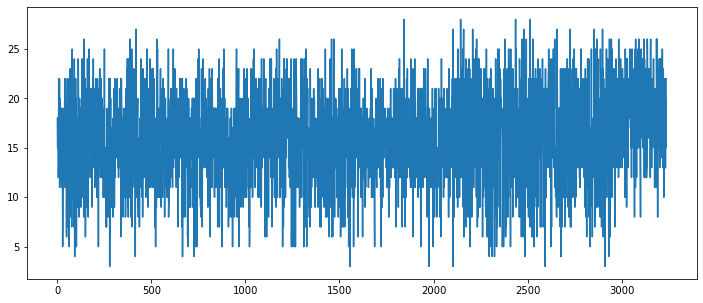

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
y = [len(text) for text in X]
x = range(1, len(y) + 1)
plt.plot(x, y)
plt.show()

We will use 25 as the length of each sentence

In [143]:
# 截短和补长
def truncate_pad(indices, pad_length, padding_token):
    # 如果长了就截断
    if len(indices) > pad_length:
        return indices[:pad_length]
    # 如果短了就补 Padding_tokken
    return indices + [padding_token]*(pad_length - len(indices))

In [145]:
import torch
train_features = torch.tensor([truncate_pad(vocab[text], 25, vocab['<pad>']) for text in X])
train_features.shape

torch.Size([3236, 25])

In [146]:
from torch.utils import data
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [147]:
train_iter = load_array((train_features, torch.tensor(y)), 64)

In [148]:
len(train_iter)

51

In [150]:
for X, y in train_iter:
    print(X)
    print(len(X))
    print(y)
    print(len(y))
    break

tensor([[ 183,  493,   69,  ...,    1,    1,    1],
        [   0,   66, 1523,  ...,    1,    1,    1],
        [1165,  207,   32,  ...,    1,    1,    1],
        ...,
        [  41,   29,  499,  ...,    1,    1,    1],
        [ 812,  258,   31,  ...,    1,    1,    1],
        [ 196,  902,    6,  ...,    1,    1,    1]])
64
tensor([ 8, 18, 21, 21, 15, 23, 19, 22, 18, 15, 13, 11, 17, 13, 12, 14,  5, 13,
         8, 14, 20, 11, 21, 22, 13, 13, 17, 18, 10,  6, 19, 15, 27,  9, 19, 20,
        11, 10, 18, 20, 19, 13, 16, 13, 16, 20, 10, 17, 17, 20,  5, 17, 25, 13,
        15, 16, 14, 10, 14, 20, 14, 17, 17, 11])
64


# 😀